# The Overlapping Generations Model

In this lecture we study the famous overlapping generations (OLG) model, which
is used by policy makers and researchers to examine 

* fiscal policy
* monetary policy 
* long-run growth

and many other topics.

The first rigorous version of the OLG model was developed by Paul Samuelson
{cite}`samuelson1958exact`.

Our aim is to gain a good understanding of a simple version of the OLG
model.

## Overview

The dynamics of the OLG model are quite similar to those of the [Solow-Swan
growth model](https://intro.quantecon.org/solow.html).

At the same time, the OLG model adds an important new feature: the choice of
how much to save is endogenous.

To see why this is important, suppose, for example, that we are interested in
predicting the effect of a new tax on long-run growth.

We could add a tax to the Solow-Swan model and look at the change in the
steady state.

But this ignores the fact that households will change their savings and
consumption behavior when they face the new tax rate.

Such changes can substantially alter the predictions of the model.

Hence, if we care about accurate predictions, we should model the decision
problems of the agents.

In particular, households in the model should decide how much to save and how
much to consume, given the environment that they face (technology, taxes,
prices, etc.)

The OLG model takes up this challenge.

We will present a simple version of the OLG model that clarifies the decision
problem of households and studies the implications for long-run growth.

Let's start with some imports.

In [1]:
import numpy as np
from scipy import optimize
from collections import namedtuple
import matplotlib.pyplot as plt

## Environment

We assume that time is discrete, so that $t=0, 1, \ldots$.

An individual born at time $t$ lives for two periods, $t$ and $t + 1$.

We call an agent

- "young" during the first period of their lives and
- "old" during the second period of their lives.

Young agents work, supplying labor and earning labor income.

They also decide how much to save.

Old agents do not work, so all income is financial.

Their financial income is from interest on their savings from wage income,
which is then combined with the labor of the new young generation at $t+1$.

The wage and interest rates are determined in equilibrium by supply and
demand.

To make the algebra slightly easier, we are going to assume a constant
population size.

We normalize the constant population size in each period to 1.

We also suppose that each agent supplies one "unit" of labor hours, so total
labor supply is 1.


## Supply of capital

First let's consider the household side.

### Consumer's problem

Suppose that utility for individuals born at time $t$ takes the form

```{math}
:label: eq_crra

    U_t = u(c_t) + \beta u(c_{t+1})
```

Here

- $u: \mathbb R_+ \to \mathbb R$ is called the "flow" utility function
- $\beta \in (0, 1)$ is the discount factor
- $c_t$ is time $t$ consumption of the individual born at time $t$
- $c_{t+1}$ is time $t+1$ consumption of the same individual 

We assume that $u$ is strictly increasing.

Savings behavior is determined by the optimization problem


```{math}
:label: max_sav_olg
    \max_{c_t, c_{t+1}} 
    \,  \left \{ u(c_t) + \beta u(c_{t+1}) \right \} 
```

subject to

$$
     c_t + s_t \le w_t 
     \quad \text{and} \quad
     c_{t+1}   \le R_{t+1} s_t
$$

Here

- $s_t$ is savings by an individual born at time $t$ 
- $w_t$ is the wage rate at time $t$
- $R_{t+1}$ is the gross interest rate on savings invested at time $t$, paid at time $t+1$

Since $u$ is strictly increasing, both of these constraints will hold as equalities at the maximum.

Using this fact and substituting $s_t$ from the first constraint into the second we get
$c_{t+1} = R_{t+1}(w_t - c_t)$.

The first-order condition for a maximum can be obtained
by plugging $c_{t+1}$ into the objective function, taking the derivative
with respect to $c_t$, and setting it to zero.

This leads to the **Euler equation** of the OLG model, which describes the optimal intertemporal consumption dynamics:

```{math}
:label: euler_1_olg
    u'(c_t) = \beta R_{t+1}  u'( R_{t+1} (w_t - c_t))
```

From the first constraint we get $c_t = w_t - s_t$, so the Euler equation
can also be expressed as

```{math}
:label: euler_2_olg
    u'(w_t - s_t) = \beta R_{t+1}  u'( R_{t+1} s_t)
```

Suppose that, for each $w_t$ and $R_{t+1}$, there is exactly one $s_t$ that
solves [](euler_2_olg).

Then savings can be written as a fixed function of $w_t$ and $R_{t+1}$.

We write this as

```{math}
:label: saving_1_olg
    s_t = s(w_t, R_{t+1})
```

The precise form of the function $s$ will depend on the choice of flow utility
function $u$.

Together, $w_t$ and $R_{t+1}$ represent the *prices* in the economy (price of
labor and rental rate of capital).

Thus, [](saving_1_olg) states the quantity of savings given prices.


### Example: log preferences

In the special case $u(c) = \log c$, the Euler equation simplifies to
    $s_t= \beta (w_t - s_t)$.

Solving for saving, we get

```{math}
:label: saving_log_2_olg
    s_t = s(w_t, R_{t+1}) = \frac{\beta}{1+\beta} w_t
```

In this special case, savings does not depend on the interest rate.



### Savings and investment

Since the population size is normalized to 1, $s_t$ is also total savings in
the economy at time $t$.

In our closed economy, there is no foreign investment, so net savings equals
total investment, which can be understood as supply of capital to firms.


In the next section we investigate demand for capital.

Equating supply and demand will allow us to determine equilibrium in the OLG
economy.



## Demand for capital

First we describe the firm's problem and then we write down an equation
describing demand for capital given prices.


### Firm's problem

For each integer $t \geq 0$, output $y_t$ in period $t$ is given by the 
**[Cobb-Douglas production function](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function)**

```{math}
:label: cobb_douglas
    y_t = k_t^{\alpha} \ell_t^{1-\alpha}
```

Here $k_t$ is capital, $\ell_t$ is labor, and  $\alpha$ is a parameter
(sometimes called the "output elasticity of capital").

The profit maximization problem of the firm is

```{math}
:label: opt_profit_olg
    \max_{k_t, \ell_t} \{ k^{\alpha}_t \ell_t^{1-\alpha} - R_t k_t -w_t \ell_t  \}
```

The first-order conditions are obtained by taking the derivative of the
objective function with respect to capital and labor respectively and setting
them to zero:

```{math}
    (1-\alpha)(k_t / \ell_t)^{\alpha} = w_t
    \quad \text{and} \quad
    \alpha (k_t / \ell_t)^{\alpha - 1} = R_t
```


### Demand 

Using our assumption $\ell_t = 1$ allows us to write 

```{math}
:label: wage_one
    w_t = (1-\alpha)k_t^\alpha 
```

and

```{math}
:label: interest_rate_one
    R_t =
    \alpha k_t^{\alpha - 1} 
```

Rearranging [](interest_rate_one) gives the aggregate demand for capital
at time $t+1$

```{math}
:label: aggregate_demand_capital_olg
    k^d (R_{t+1}) 
    := \left (\frac{\alpha}{R_{t+1}} \right )^{1/(1-\alpha)}
```

In Python code this is

In [2]:
def capital_demand(R, α):
    return (α/R)**(1/(1-α)) 

In [3]:
def capital_supply(R, β, w):
    R = np.ones_like(R)
    return R * (β / (1 + β)) * w

The next figure plots the supply of capital, as in [](saving_log_2_olg), as well as the demand for capital, as in [](aggregate_demand_capital_olg), as functions of the interest rate $R_{t+1}$.

(For the special case of log utility, supply does not depend on the interest rate, so we have a constant function.)

## Equilibrium

In this section we derive equilibrium conditions and investigate an example.


### Equilibrium conditions

In equilibrium, savings at time $t$ equals investment at time $t$, which
equals capital supply at time $t+1$.

Equilibrium is computed by equating these quantities, setting


```{math}
:label: equilibrium_1
    s(w_t, R_{t+1}) 
    = k^d(R_{t+1})
    = \left (\frac{\alpha}{R_{t+1}} \right )^{1/(1-\alpha)}
```


In principle, we can now solve for the equilibrium price $R_{t+1}$ given $w_t$.

(In practice, we first need to specify the function $u$ and hence $s$.)


When we solve this equation, which concerns time $t+1$ outcomes, time
$t$ quantities are already determined, so we can treat $w_t$ as a constant.

From equilibrium $R_{t+1}$ and [](aggregate_demand_capital_olg), we can obtain
the equilibrium quantity $k_{t+1}$.


### Example: log utility

In the case of log utility, we can use [](equilibrium_1) and [](saving_log_2_olg) to obtain

```{math}
:label: equilibrium_2
    \frac{\beta}{1+\beta} w_t
    = \left( \frac{\alpha}{R_{t+1}} \right)^{1/(1-\alpha)}
```

Solving for the equilibrium interest rate gives

```{math}
:label: equilibrium_price
    R_{t+1} = 
    \alpha 
    \left( 
        \frac{\beta}{1+\beta} w_t
    \right)^{\alpha-1}
```

In Python we can compute this via

In [4]:
def equilibrium_R_log_utility(α, β, w):
    R = α * ( (β * w) / (1 + β))**(α - 1)
    return R

In the case of log utility, since capital supply does not depend on the interest rate, the equilibrium quantity is fixed by supply.

That is,

```{math}
:label: equilibrium_quantity
    k_{t+1} = s(w_t, R_{t+1}) = \frac{\beta }{1+\beta} w_t
```

Let's redo our plot above but now inserting the equilibrium quantity and price.

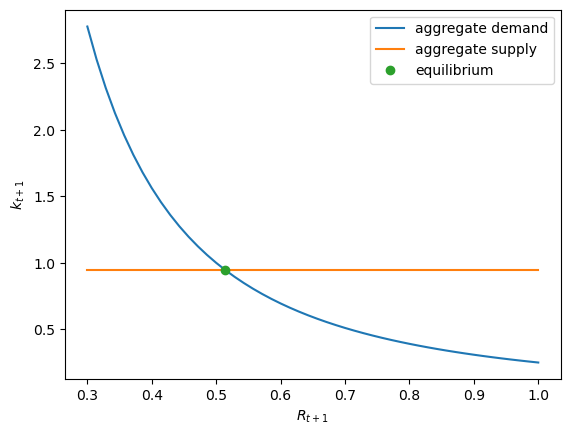

In [5]:
R_vals = np.linspace(0.3, 1)
α, β = 0.5, 0.9
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, α), 
        label="aggregate demand")
ax.plot(R_vals, capital_supply(R_vals, β, w), 
        label="aggregate supply")

R_e = equilibrium_R_log_utility(α, β, w)
k_e = (β / (1 + β)) * w

ax.plot(R_e, k_e, 'o',label='equilibrium')

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

## Dynamics 

In this section we discuss dynamics.

For now we will focus on the case of log utility, so that the equilibrium is determined by [](equilibrium_quantity).

### Evolution of capital

The discussion above shows how equilibrium $k_{t+1}$ is obtained given $w_t$.

From [](wage_one) we can translate this into $k_{t+1}$ as a function of $k_t$

In particular, since $w_t = (1-\alpha)k_t^\alpha$, we have

```{math}
:label: law_of_motion_capital
    k_{t+1} = \frac{\beta}{1+\beta} (1-\alpha)(k_t)^{\alpha}
```

If we iterate on this equation, we get a sequence for capital stock.


Let's plot the 45-degree diagram of these dynamics, which we write as

$$
    k_{t+1} = g(k_t)
    \quad \text{where }
    g(k) := \frac{\beta}{1+\beta} (1-\alpha)(k)^{\alpha}
$$

In [6]:
def k_update(k, α, β):
    return β * (1 - α) * k**α /  (1 + β)

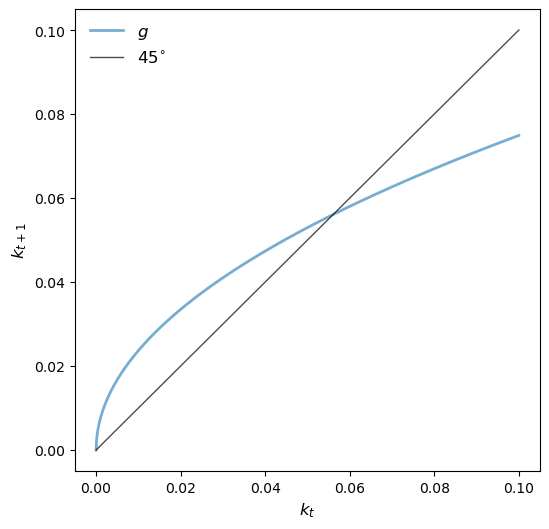

In [7]:
α, β = 0.5, 0.9
kmin, kmax = 0, 0.1
n = 1000
k_grid = np.linspace(kmin, kmax, n)
k_grid_next = k_update(k_grid,α,β)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

### Steady state (log case)

The diagram shows that the model has a unique positive steady state, which we
denote by $k^*$.

We can solve for $k^*$ by setting $k^* = g(k^*)$, or

```{math}
:label: steady_state_1
    k^* = \frac{\beta (1-\alpha) (k^*)^{\alpha}}{(1+\beta)}
```

Solving this equation yields

```{math}
:label: steady_state_2
    k^* = \left (\frac{\beta (1-\alpha)}{1+\beta} \right )^{1/(1-\alpha)}
```

We can get the steady state interest rate from [](interest_rate_one), which yields

$$
    R^* = \alpha (k^*)^{\alpha - 1} 
        = \frac{\alpha}{1 - \alpha} \frac{1 + \beta}{\beta}
$$

In Python we have

In [8]:
k_star = ((β * (1 - α))/(1 + β))**(1/(1-α))
R_star = (α/(1 - α)) * ((1 + β) / β)

### Time series

The 45-degree diagram above shows that time series of capital with positive initial conditions converge to this steady state.

Let's plot some time series that visualize this.

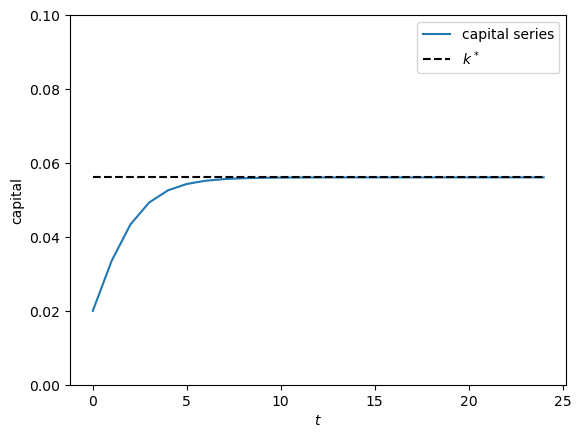

In [9]:
ts_length = 25
k_series = np.empty(ts_length)
k_series[0] = 0.02
for t in range(ts_length - 1):
    k_series[t+1] = k_update(k_series[t], α, β)

fig, ax = plt.subplots()
ax.plot(k_series, label="capital series")
ax.plot(range(ts_length), np.full(ts_length, k_star), 'k--', label="$k^*$")
ax.set_ylim(0, 0.1)
ax.set_ylabel("capital")
ax.set_xlabel("$t$")
ax.legend()
plt.show()

If you experiment with different positive initial conditions, you will see that the series always converges to $k^*$.

Below we also plot the gross interest rate over time.

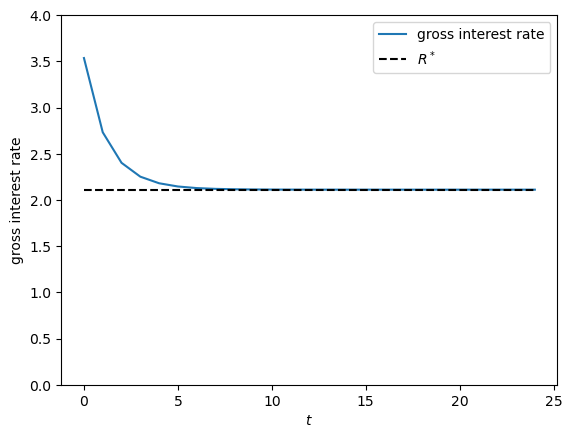

In [10]:
R_series = α * k_series**(α - 1)

fig, ax = plt.subplots()
ax.plot(R_series, label="gross interest rate")
ax.plot(range(ts_length), np.full(ts_length, R_star), 'k--', label="$R^*$")
ax.set_ylim(0, 4)
ax.set_ylabel("gross interest rate")
ax.set_xlabel("$t$")
ax.legend()
plt.show()

The interest rate reflects the marginal product of capital, which is high when capital stock is low.

## CRRA preferences

Previously, in our examples, we looked at the case of log utility.

Log utility is a rather special case of CRRA utility with $\gamma \to 1$.

In this section, we are going to assume that $u(c) = \frac{ c^{1-
\gamma}-1}{1-\gamma}$, where $\gamma >0, \gamma\neq 1$.

This function is called the CRRA utility function.

In other respects, the model is the same.

Below we define the utility function in Python and construct a `namedtuple` to store the parameters.

In [11]:
def crra(c, γ):
    return c**(1 - γ) / (1 - γ)

Model = namedtuple('Model', ['α',        # Cobb-Douglas parameter
                             'β',        # discount factor
                             'γ']        # parameter in CRRA utility
                   )

def create_olg_model(α=0.4, β=0.9, γ=0.5):
    return Model(α=α, β=β, γ=γ)

Let's also redefine the capital demand function to work with this `namedtuple`.

In [12]:
def capital_demand(R, model):
    return (α/R)**(1/(1-model.α)) 

### Supply


For households, the Euler equation becomes
```{math}
:label: euler_crra
    (w_t - s_t)^{-\gamma} = \beta R^{1-\gamma}_{t+1}  (s_t)^{-\gamma}
```


Solving for savings, we have

```{math}
:label: saving_crra
    s_t 
    = s(w_t, R_{t+1}) 
    = w_t \left [ 
        1 + \beta^{-1/\gamma} R_{t+1}^{(\gamma-1)/\gamma} 
      \right ]^{-1}
```


Notice how, unlike the log case, savings now depends on the interest rate.

In [13]:
def savings_crra(w, R, model):
    α, β, γ = model
    return w / (1 + β**(-1/γ) * R**((γ-1)/γ)) 

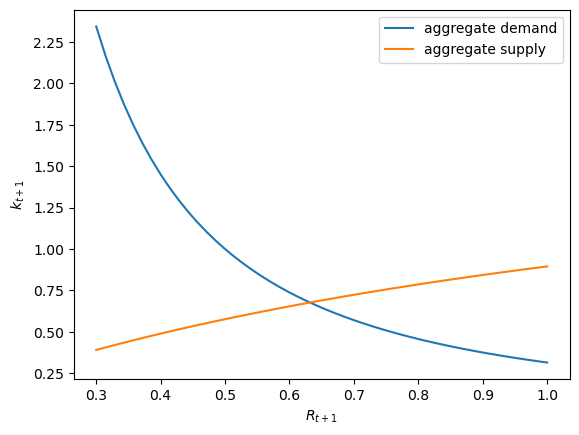

In [14]:
model = create_olg_model()
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, model), 
        label="aggregate demand")
ax.plot(R_vals, savings_crra(w, R_vals, model), 
        label="aggregate supply")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

### Equilibrium

Equating aggregate demand for capital  (see [](aggregate_demand_capital_olg))
with our new aggregate supply function yields equilibrium capital.

Thus, we set


```{math}
:label: equilibrium_crra_2
    w_t \left [ 1 + \beta^{-1/\gamma} R_{t+1}^{(\gamma-1)/\gamma} \right ]^{-1} 
    = \left (\frac{R_{t+1}}{\alpha} \right )^{1/(\alpha - 1)}
```

This expression is quite complex and we cannot solve for $R_{t+1}$ analytically.


Combining [](interest_rate_one) and [](equilibrium_crra_2) yields 

```{math}
:label: law_of_motion_capital_crra
    k_{t+1} = \left [ 1 + \beta^{-1/\gamma} (\alpha k^{\alpha - 1}_{t+1})^{(\gamma-1)/\gamma} \right ]^{-1} (1-\alpha)(k_t)^{\alpha}
```

Again, with this equation and $k_t$ as given, we cannot solve for $k_{t+1}$ by pencil and paper.


In the exercise below, you will be asked to solve these equations numerically.

## Exercises


```{exercise}
:label: olg_ex1

Solve for the dynamics of equilibrium capital stock in the CRRA case numerically using [](law_of_motion_capital_crra).

Visualize the dynamics using a 45-degree diagram.

```


```{solution-start} olg_ex1
:class: dropdown
```


To solve for $k_{t+1}$ given $k_t$ we use [Newton's method](https://python.quantecon.org/newton_method.html).

Let

```{math}
:label: crra_newton_1
    f(k_{t+1}, k_t)
    =
    k_{t+1} 
    \left[ 
        1 + \beta^{-1/\gamma} 
        \left ( 
            \alpha k^{\alpha-1}_{t+1} 
        \right )^{(\gamma-1)/\gamma} 
    \right] - (1-\alpha) k^{\alpha}_t =0
```

If $k_t$ is given then $f$ is a function of unknown $k_{t+1}$.

Then we can use `scipy.optimize.newton` to solve $f(k_{t+1}, k_t)=0$ for $k_{t+1}$.

First let's define $f$.

In [15]:
def f(k_prime, k, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k**α
    a = α**(1-1/γ)
    b = k_prime**((α * γ - α + 1) / γ)
    p = k_prime + k_prime * β**(-1/γ) * a * b
    return p - z

Now let's define a function that finds the value of $k_{t+1}$.

In [16]:
def k_update(k, model):
    return optimize.newton(lambda k_prime: f(k_prime, k, model), 0.1)

Finally, here is the 45-degree diagram.

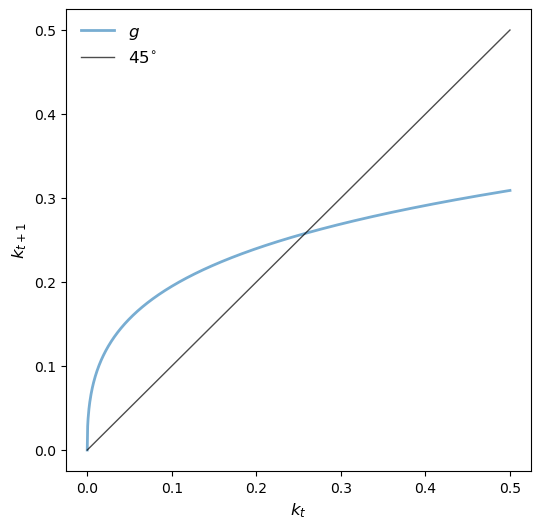

In [17]:
kmin, kmax = 0, 0.5
n = 1000
k_grid = np.linspace(kmin, kmax, n)
k_grid_next = np.empty_like(k_grid)

for i in range(n):
    k_grid_next[i] = k_update(k_grid[i], model)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

```{solution-end}
```


```{exercise}
:label: olg_ex2

The 45-degree diagram from the last exercise shows that there is a unique
positive steady state.

The positive steady state can be obtained by setting  $k_{t+1} = k_t = k^*$ in [](law_of_motion_capital_crra), which yields

$$
    k^* = 
    \frac{(1-\alpha)(k^*)^{\alpha}}
    {1 + \beta^{-1/\gamma} (\alpha (k^*)^{\alpha-1})^{(\gamma-1)/\gamma}}
$$

Unlike the log preference case, the CRRA utility steady state $k^*$ 
cannot be obtained analytically.

Instead, we solve for $k^*$ using Newton's method.

```


```{solution-start} olg_ex2
:class: dropdown
```

We introduce a function $h$ such that
positive steady state is the root of $h$.

```{math}
:label: crra_newton_2
    h(k^*) = k^*  
    \left [ 
        1 + \beta^{-1/\gamma} (\alpha (k^*)^{\alpha-1})^{(\gamma-1)/\gamma} 
    \right ] - (1-\alpha)(k^*)^{\alpha}
```

Here it is in Python

In [18]:
def h(k_star, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k_star**α
    R1 = α ** (1-1/γ)
    R2 = k_star**((α * γ - α + 1) / γ)
    p = k_star + k_star * β**(-1/γ) * R1 * R2
    return p - z

Let's apply Newton's method to find the root:

In [19]:
k_star = optimize.newton(h, 0.2, args=(model,))
print(f"k_star = {k_star}")

k_star = 0.25788950250843484


```{solution-end}
```




```{exercise}
:label: olg_ex3

Generate three time paths for capital, from
three distinct initial conditions, under the parameterization listed above.

Use initial conditions for $k_0$ of $0.001, 1.2, 2.6$ and time series length 10.

```


```{solution-start} olg_ex3
:class: dropdown
```


Let's define the constants and three distinct intital conditions

In [20]:
ts_length = 10
k0 = np.array([0.001, 1.2, 2.6])

In [21]:
def simulate_ts(model, k0_values, ts_length):

    fig, ax = plt.subplots()

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for k_init in k0_values:
        ts[0] = k_init
        for t in range(1, ts_length):
            ts[t] = k_update(ts[t-1], model)
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %k_init)
    ax.plot(np.arange(ts_length), np.full(ts_length, k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

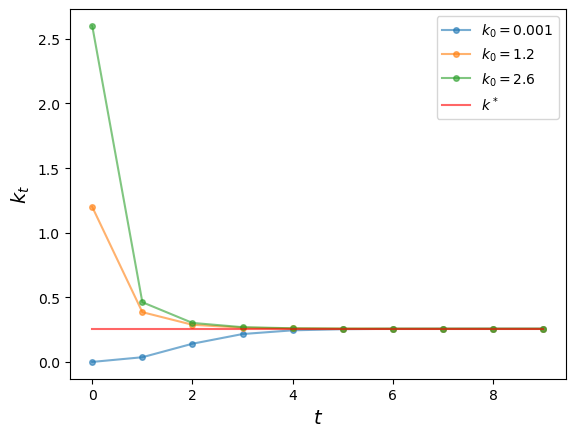

In [22]:
simulate_ts(model, k0, ts_length)

```{solution-end}
```